In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn
import pandas as pd
import cv2
import sys
import time
import scipy.ndimage as ndi 


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: No module named 'cv2'

In [6]:
import re
from datetime import datetime as dt

In [5]:
fname = '_2021-07-25-120729'
re.findall(r'_([0-9]{4}-[0-9]{2}-[0-9]{2}-[0-9]{6})',fname)[0]

'2021-07-25-120729'

In [11]:
dt.strptime('2021-07-25-120729','%Y-%M-%d-%H%m%S')

datetime.datetime(2021, 7, 25, 12, 7, 29)

In [60]:
sys.path.append('C:/Users/yweissenberger/Documents/pycontrol_newest_10_02_21/tools/')

In [61]:
import rsync

In [62]:
ROOT = r'D:\MEC_OF_video'
#dataFile = r'OF1_recording_2021-07-20-100229.mp4'
#dataFile = r'518250_OF_2021-07-23-151841.mp4'
dataFile = '518248_OFB_2021-07-25-120729.mp4'

In [4]:
path = os.path.join(ROOT,dataFile)

In [5]:
def extract_position_from_video(path,save_path=None,verbose=0):
    """ Function that extracts the position of the
        animal by detecting a dark blob
    """
    vidcap = cv2.VideoCapture(path)
    success,image = vidcap.read()
    count = 1
    position = []
    st = time.time()
    while success:
        success,image = vidcap.read()
        img2 = image[30:-230,360:-210,0]
        ret,thresh = cv2.threshold(img2,20,255,1)
        pos = np.median(np.vstack(np.where(thresh>0)),axis=1)
        position.append(pos)
        if verbose:
            sys.stdout.write("\rframeNR:{:.2f}  | iter speed:{:.4f}".format(count,(time.time()-st)/float(count)))
            sys.stdout.flush()
        #break
        #print('Read a new frame: ', success)
        count += 1
    return np.array(position)

In [6]:
os.path.isfile(path)

True

In [9]:
vidcap = cv2.VideoCapture(path)
success,image = vidcap.read()
count = 1
position = []
st = time.time()
while success:
    success,image = vidcap.read()
    img2 = image[30:-230,360:-210,0]
    ret,thresh = cv2.threshold(img2,20,255,1)
    pos = np.median(np.vstack(np.where(thresh>0)),axis=1)
    position.append(pos)
    sys.stdout.write("\rframeNR:{:.2f}  | iter speed:{:.4f}".format(count,(time.time()-st)/float(count)))
    sys.stdout.flush()
    #break
    #print('Read a new frame: ', success)
    count += 1

frameNR:3442.00  | iter speed:0.0086

C:\Users\yweissenberger\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\yweissenberger\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


frameNR:98011.00  | iter speed:0.0090

TypeError: 'NoneType' object is not subscriptable

In [145]:
from skimage.feature import blob_dog, blob_log, blob_doh


In [14]:
position = np.array(position)

In [15]:
#img2 = image[30:-230,360:-210,0]
#ret,thresh = cv2.threshold(img2,20,255,1)
#pos = np.vstack(np.where(thresh>0)).mean(axis=1)
#position.append(pos)

In [16]:
#pos = np.median(np.vstack(np.where(thresh>0)),axis=1)


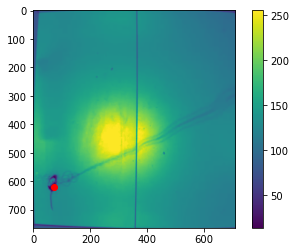

In [17]:
#plt.imshow(image[20:-220,340:-180,0])
plt.imshow(img2)
plt.colorbar()
#plt.xlim(200,500)
#plt.ylim(0,100)
plt.scatter(pos[1],pos[0],color='r')


In [18]:
#position = np.array(position)
position_backup = position.copy()

In [19]:
clr_ = seaborn.color_palette('RdBu_r',n_colors=len(position[:,0]))

In [20]:
for i in range(1,position.shape[0]):
    if np.abs(position[i-1,:]-position[i]).sum()>100:
        position[i] = position[i-1]

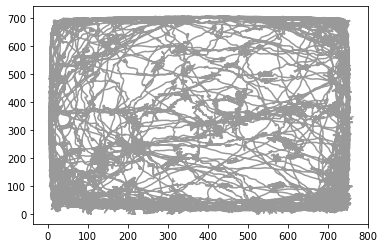

In [21]:
n_ = 1
#plt.scatter(position[::n_,0],position[::n_,1],c=clr_,s=8,alpha=1)
plt.plot(position[::n_,0],position[::n_,1],color='k',alpha=.4)


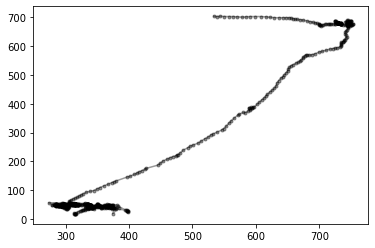

In [29]:
slc =  slice(1000,2000)
plt.plot(position[slc,0],position[slc,1],color='k',alpha=.4,marker='.')


In [47]:
#n_= 4
#clr_ = seaborn.color_palette('RdBu_r',n_colors=len(position[::n_,0]))
#plt.scatter(position[::n_,0],position[::n_,1],c=clr_)
#plt.xlim

In [48]:
#syncd1 = r'D:\MEC_data\mouse_1\20072021\2021-07-20_10-02-34\Record Node 101\experiment1\recording1\events\Neuropix-PXI-100.0\TTL_1'
#syncd1 = r'D:\MEC_data\mouse2\2021-07-20_13-20-50\Record Node 101\experiment1\recording1\events\Neuropix-PXI-100.0\TTL_1'
#syncd1 = r'D:\MEC_data\mouse3\2021-07-23_15-18-37\Record Node 101\experiment1\recording1\events\Neuropix-PXI-100.0\TTL_1'
#syncd1 = r'D:\MEC_data\mouse3\2021-07-24_15-10-14\Record Node 101\experiment1\recording1\events\Neuropix-PXI-100.0\TTL_1'
syncd1 = r'D:\MEC_data\519725\2021-07-25_12-07-36\Record Node 101\experiment1\recording1\events\Neuropix-PXI-100.0\TTL_1'
fname = 'timestamps.npy'
sync_messages = np.load(os.path.join(syncd1,fname))[::2][:-1].astype('float')

In [49]:
import scipy as sp
import scipy.signal

In [50]:
occupancy_arr

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.39435547e-10, 4.61451748e-11, 3.93852901e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.19072364e-10, 3.93852901e-11, 3.36156724e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.36156724e-11, 0.00000000e+00, 0.00000000e+00]])

In [87]:


def get_autocorrelation(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    iff = np.fft.ifft2(f)
    #AC = np.fft.ifft2(np.abs(f) ** 2 )
    #AC = np.fft.ifftshift(AC)
     #The two lines above have the same effect as the two lines below.
    AC = np.fft.ifft2(np.abs(f) ** 2 )
    AC = np.fft.fftshift(AC)
    return np.abs(AC)

In [114]:
M = (all_resp_arr[129]/occupancy_arr)[150:-10,150:-10]
out = get_autocorrelation(M)

<ipython-input-114-1734394ef252>:1: RuntimeWarning: invalid value encountered in true_divide
  M = (all_resp_arr[129]/occupancy_arr)[150:-10,150:-10]


In [115]:
out

array([[1485040.52375473, 1485038.66209484, 1485033.08016505, ...,
        1485023.78717968, 1485033.08016505, 1485038.66209484],
       [1485040.30412274, 1485038.91119098, 1485033.79872123, ...,
        1485022.16924471, 1485031.92667254, 1485037.97481767],
       [1485039.64276684, 1485038.71910645, 1485034.07880036, ...,
        1485020.12089612, 1485030.33685003, 1485036.84743559],
       ...,
       [1485038.54025679, 1485035.28102074, 1485028.31225974, ...,
        1485026.0504983 , 1485033.91993898, 1485038.08589843],
       [1485039.64276684, 1485036.84743559, 1485030.33685003, ...,
        1485025.73034192, 1485034.07880036, 1485038.71910645],
       [1485040.30412274, 1485037.97481767, 1485031.92667254, ...,
        1485024.97557241, 1485033.79872123, 1485038.91119098]])

In [90]:
out

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [51]:
syncd2 = r"D:/MEC_OF_video/"

#fname2 = "OF1_recording_pinstate_2021-07-20-100229.csv"
#fname2 = '519180_OF_pinstate_2021-07-20-132041.csv'
#fname2 = '518250_OF_pinstate_2021-07-23-151841.csv'
#fname2= '518248_OFB_pinstate_2021-07-24-151011.csv'
fname2 = '518248_OFB_pinstate_2021-07-25-120729.csv'
sync_df = pd.read_csv(os.path.join(syncd2,fname2),header=None)
sync_messages2 = np.where((sync_df[0].values[1:] - sync_df[0].values[:-1])<0)[0].astype('float')

In [52]:
(sync_messages[1:] - sync_messages[:-1])[:10]

array([ 53018.,  93688., 103258.,  92609., 272335.,  32700.,  52019.,
       202676., 166677.,  70949.])

In [53]:
1/45*(sync_messages2[1:] - sync_messages2[:-1])[:10]*30000

array([ 35333.33333333,  62000.        ,  69333.33333333,  61333.33333333,
       182000.        ,  21333.33333333,  34666.66666667, 135333.33333333,
       111333.33333333,  47333.33333333])

In [54]:
np.diff(sync_messages2)[:10]

array([ 53.,  93., 104.,  92., 273.,  32.,  52., 203., 167.,  71.])

In [55]:
sync_messages2[0]

393.0

In [56]:
len(sync_messages)

644

In [57]:
len(sync_messages2)

645

In [63]:
aligner = rsync.Rsync_aligner(sync_messages,sync_messages2,units_A=30/30000.,units_B=1)

In [64]:
#ROOT = r'D:\MEC_data\mouse_1\20072021\ks25'
#ROOT = r'D:/MEC_data/mouse2/2021-07-20_13-20-50/ks25/'
#ROOT = r'D:\MEC_data\mouse3\2021-07-23_15-18-37\ks25'
#ROOT = r'D:\MEC_data\mouse3\2021-07-24_15-10-14\ks25'
ROOT = r'D:\MEC_data\519725\2021-07-25_12-07-36\ks25'
spkT = np.load(os.path.join(ROOT,'spike_times.npy')).flatten()
spkC = np.load(os.path.join(ROOT,'spike_clusters.npy')).flatten()
cluster_labels = pd.read_table(os.path.join(ROOT,'cluster_KSLabel.tsv'))

In [65]:
single_units = np.where(cluster_labels.KSLabel=='good')[0]

In [66]:
from scipy.ndimage import gaussian_filter

In [22]:
def gaussian_kernel(win_size, sigma):
    t = np.arange(win_size)
    x, y = np.meshgrid(t, t)
    o = (win_size - 1) / 2
    r = np.sqrt((x - o)**2 + (y - o)**2)
    scale = 1 / (sigma**2 * 2 * np.pi)
    return scale * np.exp(-0.5 * (r / sigma)**2)

In [24]:
dd_ = 100
sigma= 25
g = gaussian_kernel(2*dd_,sigma)

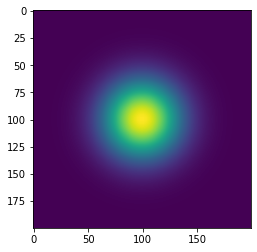

In [25]:
plt.imshow(g)

In [ ]:
def get_half_split_maps(unit,spkT,spkC,aligner):
    """ divides the session into two halves and calculates 
    firing rate maps separately for each half. Also returns
    correlation between the two maps
    """

In [147]:
def get_rate_map(aligned_spike_times,position,start=None,end=None):
    resp_arr = np.zeros([1000,1000])
    if start is not None:
        aligned_spike_times = aligned_spike_times[aligned_spike_times>start]
    if end is not None:
        aligned_spike_times = aligned_spike_times[aligned_spike_times<start]

    for spk in aligned_spike_times:
        tmp_ = np.zeros([1000,1000])
        at_pos = position[i]
        xp,yp = at_pos.astype(int)
        #tmp_ = np.zeros([1000,1000])
        resp_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
    return resp_arr

In [70]:
all_resp_arr = []
n_ = 9
out_ctr = 0
for unit in single_units:#[n_:n_+1]:
    spk_unit = spkT[np.where(spkC==unit)[0]]
    
    
    aligned_T = aligner.A_to_B(spk_unit)
    #get the spikes that are in bounds for position encoding
    spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
    used_spikes = aligned_T[spks_unit_in_bounds].astype('int')
    resp_arr = np.zeros([1000,1000])
    
    for i in used_spikes:#[int(len(used_spikes)/2):]:
        try:
            tmp_ = np.zeros([1000,1000])
            at_pos = position[i]
            xp,yp = at_pos.astype(int)
            #tmp_ = np.zeros([1000,1000])
            resp_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
            #tmp_ = gaussian_filter(tmp_,[10,10])
            #resp_arr += tmp_
            #mu = at_pos
            #d = ((np.dstack([x,y]) - mu[None,None,:])**2).sum(axis=2)
            #g = np.exp(-( (d)**2 / ( 2.0 * sigma**2 ) ) )
            #resp_arr += g
            #resp_arr[xp-1dd_:xp+1dd_,yp-1dd_:yp+1dd_] += g
        except:
            out_ctr += 1
            #print('!')
            pass
    print('unit:{}  |  n_spikes:{}  | FR:{:.2f} | n_out_of_bounds:{}  | mu_T:{:.2f}'
          .format(unit,len(spks_unit_in_bounds),30*len(spks_unit_in_bounds)/(len(position)),out_ctr,np.mean(spk_unit)/30000.))
    all_resp_arr.append(resp_arr.copy())

unit:7  |  n_spikes:1159  | FR:0.71 | n_out_of_bounds:314  | mu_T:1433.30
unit:9  |  n_spikes:93  | FR:0.06 | n_out_of_bounds:347  | mu_T:1620.86
unit:11  |  n_spikes:13  | FR:0.01 | n_out_of_bounds:352  | mu_T:2111.13
unit:12  |  n_spikes:1360  | FR:0.83 | n_out_of_bounds:671  | mu_T:2133.86
unit:16  |  n_spikes:18366  | FR:11.24 | n_out_of_bounds:5781  | mu_T:1593.40
unit:20  |  n_spikes:22843  | FR:13.98 | n_out_of_bounds:12893  | mu_T:1531.50
unit:21  |  n_spikes:473  | FR:0.29 | n_out_of_bounds:13048  | mu_T:1937.51
unit:22  |  n_spikes:5251  | FR:3.21 | n_out_of_bounds:14922  | mu_T:1453.04
unit:23  |  n_spikes:33  | FR:0.02 | n_out_of_bounds:14929  | mu_T:1439.68
unit:24  |  n_spikes:29646  | FR:18.15 | n_out_of_bounds:23635  | mu_T:1568.69
unit:26  |  n_spikes:6841  | FR:4.19 | n_out_of_bounds:26303  | mu_T:1198.74
unit:27  |  n_spikes:8824  | FR:5.40 | n_out_of_bounds:29075  | mu_T:1916.22
unit:30  |  n_spikes:32  | FR:0.02 | n_out_of_bounds:29084  | mu_T:1702.08
unit:31  |  n

unit:202  |  n_spikes:112977  | FR:69.16 | n_out_of_bounds:497273  | mu_T:1623.33
unit:203  |  n_spikes:3270  | FR:2.00 | n_out_of_bounds:498322  | mu_T:2155.16
unit:204  |  n_spikes:6570  | FR:4.02 | n_out_of_bounds:500312  | mu_T:1995.70
unit:205  |  n_spikes:5313  | FR:3.25 | n_out_of_bounds:501829  | mu_T:1504.18
unit:208  |  n_spikes:14053  | FR:8.60 | n_out_of_bounds:505178  | mu_T:1536.79
unit:209  |  n_spikes:8659  | FR:5.30 | n_out_of_bounds:507740  | mu_T:1521.43
unit:210  |  n_spikes:5257  | FR:3.22 | n_out_of_bounds:508995  | mu_T:1948.73
unit:211  |  n_spikes:66  | FR:0.04 | n_out_of_bounds:509015  | mu_T:1507.34
unit:212  |  n_spikes:18179  | FR:11.13 | n_out_of_bounds:514093  | mu_T:1560.88
unit:213  |  n_spikes:2136  | FR:1.31 | n_out_of_bounds:514613  | mu_T:1916.16
unit:214  |  n_spikes:8572  | FR:5.25 | n_out_of_bounds:516030  | mu_T:1637.93
unit:219  |  n_spikes:13171  | FR:8.06 | n_out_of_bounds:519837  | mu_T:1270.29
unit:220  |  n_spikes:15245  | FR:9.33 | n_out_

unit:373  |  n_spikes:98197  | FR:60.11 | n_out_of_bounds:1131276  | mu_T:1636.07
unit:374  |  n_spikes:99470  | FR:60.89 | n_out_of_bounds:1160607  | mu_T:1635.86
unit:381  |  n_spikes:9957  | FR:6.10 | n_out_of_bounds:1163369  | mu_T:1524.61
unit:382  |  n_spikes:30650  | FR:18.76 | n_out_of_bounds:1172548  | mu_T:1604.35
unit:384  |  n_spikes:13141  | FR:8.04 | n_out_of_bounds:1176695  | mu_T:1598.75
unit:385  |  n_spikes:2031  | FR:1.24 | n_out_of_bounds:1177287  | mu_T:1199.63
unit:386  |  n_spikes:14632  | FR:8.96 | n_out_of_bounds:1181492  | mu_T:1665.08
unit:389  |  n_spikes:913  | FR:0.56 | n_out_of_bounds:1181724  | mu_T:1436.19
unit:390  |  n_spikes:4255  | FR:2.60 | n_out_of_bounds:1183040  | mu_T:1703.10
unit:391  |  n_spikes:738  | FR:0.45 | n_out_of_bounds:1183151  | mu_T:1397.17
unit:392  |  n_spikes:26  | FR:0.02 | n_out_of_bounds:1183155  | mu_T:1773.15
unit:394  |  n_spikes:1511  | FR:0.92 | n_out_of_bounds:1183740  | mu_T:1441.27
unit:395  |  n_spikes:4179  | FR:2.5

unit:519  |  n_spikes:12772  | FR:7.82 | n_out_of_bounds:1411794  | mu_T:1582.79
unit:520  |  n_spikes:23399  | FR:14.32 | n_out_of_bounds:1420189  | mu_T:1336.22
unit:522  |  n_spikes:3647  | FR:2.23 | n_out_of_bounds:1421509  | mu_T:1317.70
unit:523  |  n_spikes:1463  | FR:0.90 | n_out_of_bounds:1422060  | mu_T:1469.47
unit:524  |  n_spikes:3044  | FR:1.86 | n_out_of_bounds:1423113  | mu_T:1338.69
unit:525  |  n_spikes:7201  | FR:4.41 | n_out_of_bounds:1425214  | mu_T:1699.01
unit:527  |  n_spikes:11376  | FR:6.96 | n_out_of_bounds:1428418  | mu_T:1427.38
unit:528  |  n_spikes:2412  | FR:1.48 | n_out_of_bounds:1429351  | mu_T:1641.81
unit:530  |  n_spikes:9281  | FR:5.68 | n_out_of_bounds:1432434  | mu_T:1698.58
unit:532  |  n_spikes:41  | FR:0.03 | n_out_of_bounds:1432445  | mu_T:1655.44
unit:533  |  n_spikes:9439  | FR:5.78 | n_out_of_bounds:1436683  | mu_T:1537.77
unit:534  |  n_spikes:19921  | FR:12.20 | n_out_of_bounds:1440589  | mu_T:1813.83
unit:535  |  n_spikes:25459  | FR:15

In [138]:
def get_occupancy_map(position,sigma=25,dd_=100,tot_pix_size=[1000,1000]):
    occupancy_arr = np.zeros([1000,1000])
    g = gaussian_kernel(2*dd_,sigma)
    len_pos = len(position)
    for ctr,i in enumerate(position):
        if np.remainder(ctr,10)==0:
            sys.stdout.write('\rframe:{:.2f}/{:.2f}'.format(ctr,len_pos))
            sys.stdout.flush()
        try:
            xp, yp = i.astype(int)
            #tmp_ = np.zeros([1000,1000])
            #tmp_[xp,yp] += g
            #tmp_ = gaussian_filter(tmp_,[10,10])}
            occupancy_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
        #occupancy_arr += g
        except:
            pass   
    return occupancy_arr

In [141]:
occ_map_first_half = get_occupancy_map(position[:int(position.shape[0]/2)])
occ_map_second_half = get_occupancy_map(position[int(position.shape[0]/2):])

frame:29990.00/49005.00

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



frame:31000.00/49006.00

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



frame:49000.00/49006.00

In [140]:
position.shape

(98011, 2)

In [139]:
len(position)

98011

In [26]:
occupancy_arr = np.zeros([1000,1000])

len_pos = len(position)
for ctr,i in enumerate(position):
    if np.remainder(ctr,10)==0:
        sys.stdout.write('\rframe:{:.2f}/{:.2f}'.format(ctr,len_pos))
        sys.stdout.flush()
    try:
        xp, yp = i.astype(int)
        #tmp_ = np.zeros([1000,1000])
        #tmp_[xp,yp] += g
        #tmp_ = gaussian_filter(tmp_,[10,10])}
        occupancy_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
    #occupancy_arr += g
    except:
        pass

frame:98010.00/98011.00

<ipython-input-221-331f89639b5a>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(resp_arr/occupancy_arr)


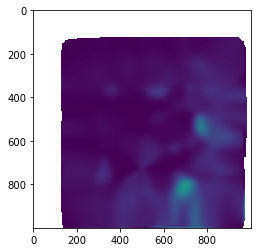

In [221]:
plt.imshow(resp_arr/occupancy_arr)

In [209]:
from numpy.fft import fft, ifft, fftshift

def xcorr(x):
    l = 2 ** int(np.log2(x.shape[1] * 2 - 1))
    fftx = fft(x, n = l, axis = 1)
    ret = ifft(fftx * np.conjugate(fftx), axis = 1)
    ret = fftshift(ret, axes=1)
    return ret

In [216]:
import numpy
from numpy.fft import fft, ifft

data = (arr/occupancy_arr)[100:600,100:600]
#rint data
##[[ 0  1  2  3]
## [ 4  5  6  7]
## [ 8  9 10 11]
## [12 13 14 15]
## [16 17 18 19]]
dataFT = fft(data, axis=1)
dataAC = ifft(dataFT * numpy.conjugate(dataFT), axis=1).real


<ipython-input-216-6d450d2825d5>:4: RuntimeWarning: invalid value encountered in true_divide
  data = (arr/occupancy_arr)[100:600,100:600]


In [212]:
out = xcorr((arr/occupancy_arr)[100:600,100:600])

<ipython-input-212-6791b74b675c>:1: RuntimeWarning: invalid value encountered in true_divide
  out = xcorr((arr/occupancy_arr)[100:600,100:600])


In [85]:
143

143

In [148]:
len(all_resp_arr)

192

In [ ]:
len(all_resp_arr)

<ipython-input-290-5d7c44433e6c>:9: RuntimeWarning: invalid value encountered in true_divide
  resp_map = gaussian_filter(arr/occupancy_arr,42,mode='constant',truncate=2)


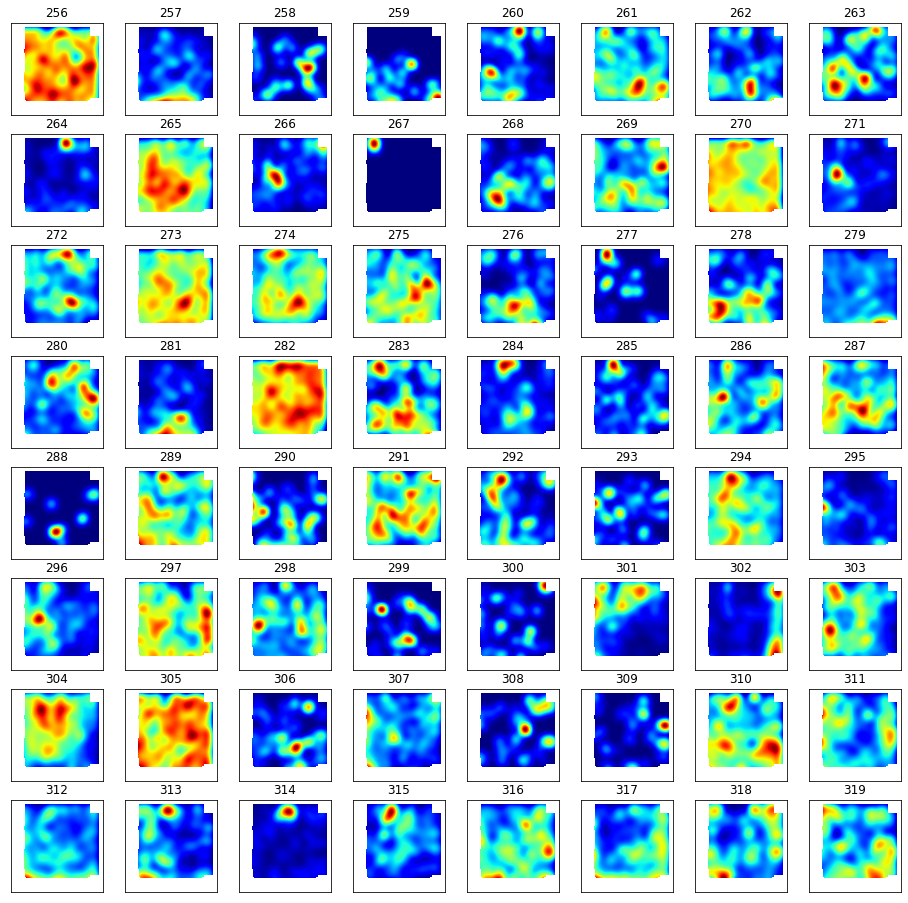

In [290]:
plt.figure(figsize=(16,16))
kk = 1

n64 = 4
for ix in range(n64*64,(n64+1)*64):
    arr = all_resp_arr[ix]
    plt.subplot(8,8,kk)
    plt.title(ix)
    resp_map = gaussian_filter(arr/occupancy_arr,42,mode='constant',truncate=2)
    #resp_map[np.isnan(resp_map)] = 0
    plt.imshow(resp_map,cmap='jet')#,vmin=.0,vmax=.2)
    plt.xlim(50,1050)
    plt.ylim(50,1050)
    plt.xticks([])
    plt.yticks([])

    kk += 1

<ipython-input-293-a597af82fc71>:1: RuntimeWarning: invalid value encountered in true_divide
  M = gaussian_filter((all_resp_arr[308]/occupancy_arr),22,mode='constant',truncate=2)


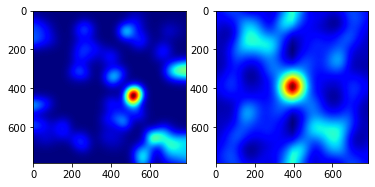

In [293]:
M = gaussian_filter((all_resp_arr[308]/occupancy_arr),22,mode='constant',truncate=2)
M = M[165:-50,165:-50]
#M = np.pad(M,200)
out = get_autocorrelation(M)
plt.subplot(1,2,1)
plt.imshow(M,cmap='jet')
plt.subplot(1,2,2)
plt.imshow(out,cmap='jet')

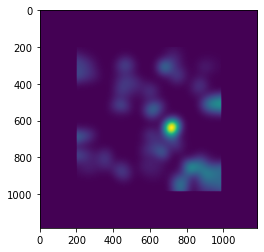

In [294]:
plt.imshow(np.pad(M,200))

# Check half split

In [265]:
def get_rate_map(aligned_spike_times,position,dd_=100,sigma=25,start=None,end=None):
    resp_arr = np.zeros([1000,1000])
    g = gaussian_kernel(2*dd_,sigma)
    print(g.shape)
    err_ctr = 0

    if start is not None:
        aligned_spike_times = aligned_spike_times[aligned_spike_times>start]
    if end is not None:
        aligned_spike_times = aligned_spike_times[aligned_spike_times<end]

    for spk in aligned_spike_times[20:]:
        try:
            tmp_ = np.zeros([1000,1000])
            at_pos = position[spk]
            xp,yp = at_pos.astype(int)
            #tmp_ = np.zeros([1000,1000])
            #print(resp_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_].shape,g.shape,at_pos)
            resp_arr[2*dd_+xp-dd_:2*dd_+xp+dd_,2*dd_+yp-dd_:2*dd_+yp+dd_] += g
        except ValueError:
            pass
            err_ctr += 1
    print(err_ctr,len(aligned_spike_times))
    return resp_arr

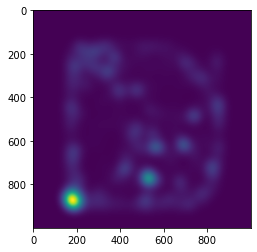

In [211]:
plt.imshow(occ_map_second_half)

In [168]:
used_spikes[used_spikes<half_time].shape

(322,)

In [212]:
half_time = int(position.shape[0]/2)
occ_map_first_half = get_occupancy_map(position[:half_time])
occ_map_second_half = get_occupancy_map(position[half_time:])

frame:29990.00/49005.00

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



frame:49000.00/49006.00

In [295]:
unit = single_units[299]
spk_unit = spkT[np.where(spkC==unit)[0]]


aligned_T = aligner.A_to_B(spk_unit)
#get the spikes that are in bounds for position encoding
spks_unit_in_bounds = np.where(np.logical_not(np.isnan(aligned_T)))[0]
used_spikes = aligned_T[spks_unit_in_bounds].astype('int')


a1 = get_rate_map(used_spikes,position,end=half_time)
a2 = get_rate_map(used_spikes,position,start=half_time)

(200, 200)
2 26
(200, 200)
0 18


<ipython-input-292-a0cbd17e5f76>:3: RuntimeWarning: invalid value encountered in true_divide
  M = gaussian_filter(a2/occ_map_second_half,42,mode='constant',truncate=2)
<ipython-input-292-a0cbd17e5f76>:11: RuntimeWarning: invalid value encountered in true_divide
  M = gaussian_filter(a1/occ_map_first_half,42,mode='constant',truncate=2)


([], [])

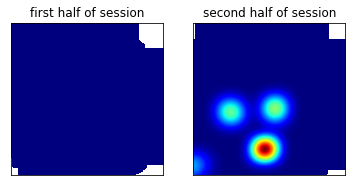

In [292]:
plt.subplot(1,2,1)
plt.title('first half of session')
M = gaussian_filter(a2/occ_map_second_half,42,mode='constant',truncate=2)
plt.imshow(M,cmap='jet')
plt.xlim(200,1000)
plt.ylim(200,1000)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.title('second half of session')
M = gaussian_filter(a1/occ_map_first_half,42,mode='constant',truncate=2)
plt.imshow(M,cmap='jet')
plt.xlim(200,1000)
plt.ylim(200,1000)
plt.xticks([])
plt.yticks([])

In [259]:
t1_ = gaussian_filter((a2/occ_map_second_half).flatten(),32)
t2_ = gaussian_filter((a1/occ_map_first_half).flatten(),32)
ixs = np.logical_and(np.isfinite(t1_),np.isfinite(t2_))
np.corrcoef(t1_[ixs],t2_[ixs])[0,1]

<ipython-input-259-0e75edc727fc>:1: RuntimeWarning: invalid value encountered in true_divide
  t1_ = gaussian_filter((a2/occ_map_second_half).flatten(),32)
<ipython-input-259-0e75edc727fc>:2: RuntimeWarning: invalid value encountered in true_divide
  t2_ = gaussian_filter((a1/occ_map_first_half).flatten(),32)


0.28216000117168466

<ipython-input-219-c6ec02094eb8>:1: RuntimeWarning: invalid value encountered in true_divide
  M = gaussian_filter(a1/occ_map_first_half,32,mode='constant',truncate=2)


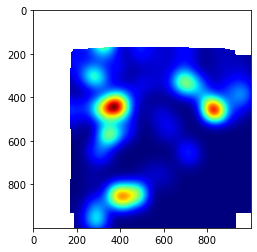

In [219]:
M = gaussian_filter(a1/occ_map_first_half,32,mode='constant',truncate=2)
plt.imshow(M,cmap='jet')